<h1>1. Generating Random Networks</h1>

In [2]:
library('igraph')


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



<h2>1a, 1b</h2>

Mean:  3.126
Variance:  3.24136536536537
Connected:  FALSE
Diameter:  14
[1] 53
Diameter of GCC:  14
Nummber of nodes in GCC:  941


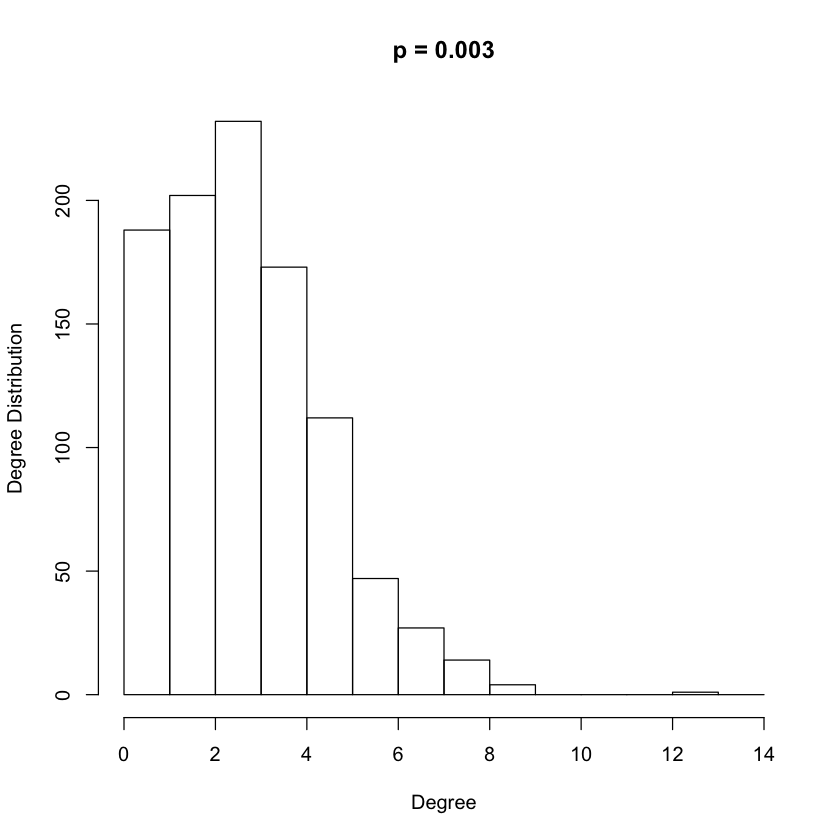

Mean:  4.048
Variance:  4.26996596596597
Connected:  FALSE
Diameter:  10
[1] 18
Diameter of GCC:  10
Nummber of nodes in GCC:  982


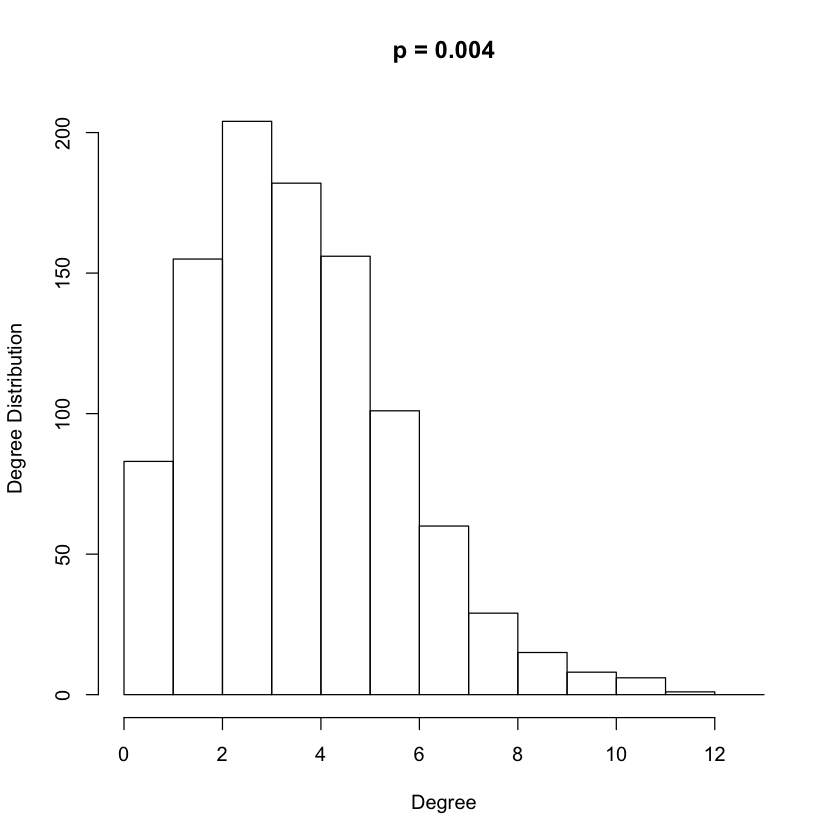

Mean:  10.036
Variance:  9.74044444444444
Connected:  TRUE
Diameter:  6


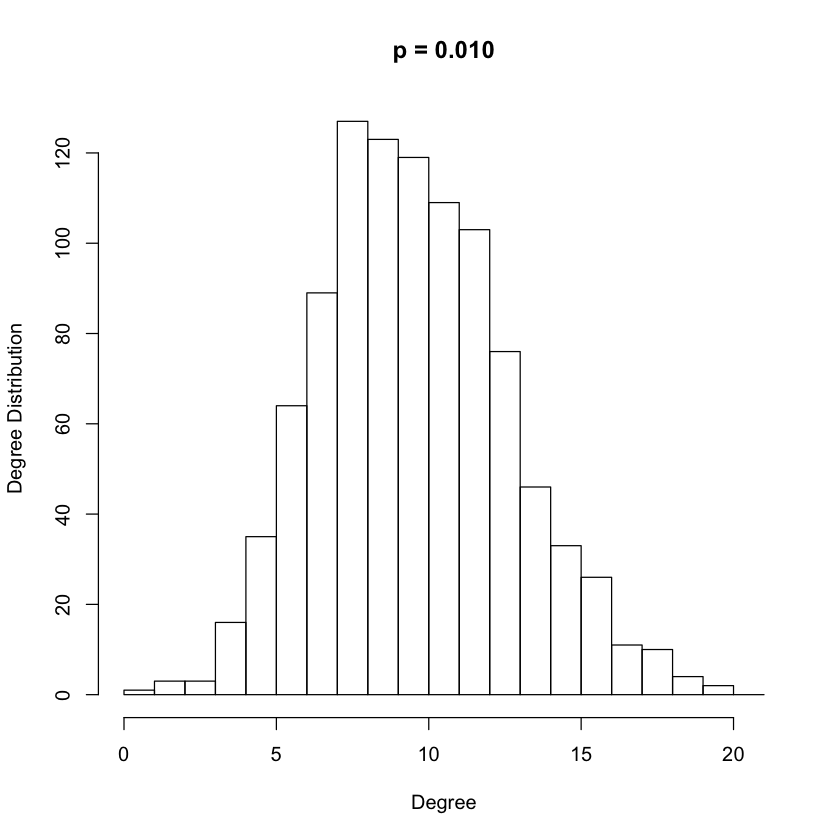

Mean:  49.79
Variance:  47.8577577577578
Connected:  TRUE
Diameter:  3


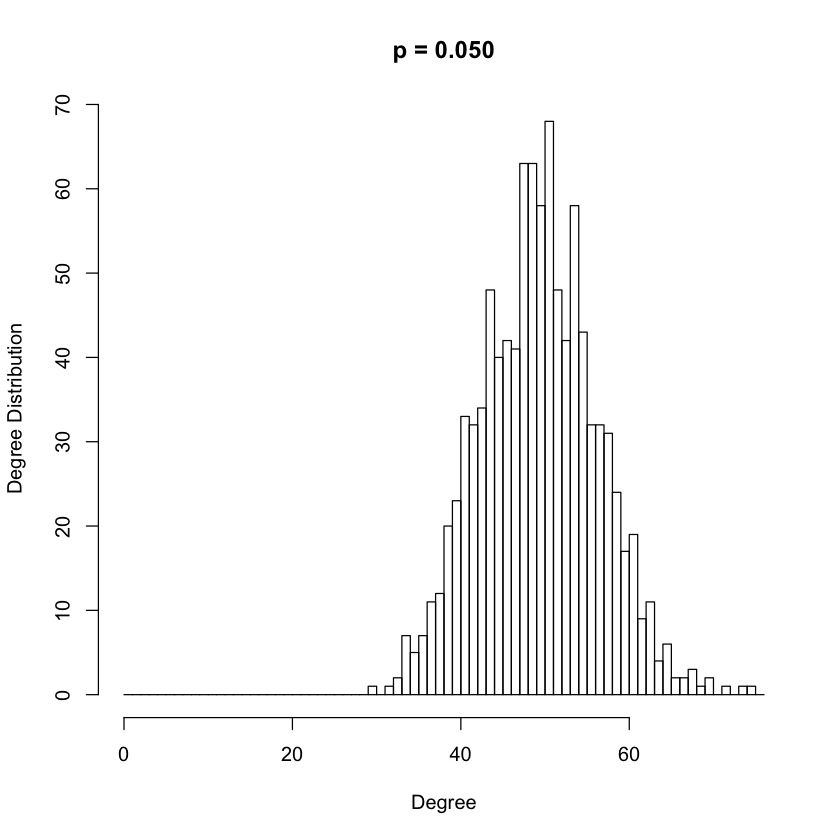

Mean:  99.964
Variance:  89.3600640640641
Connected:  TRUE
Diameter:  3


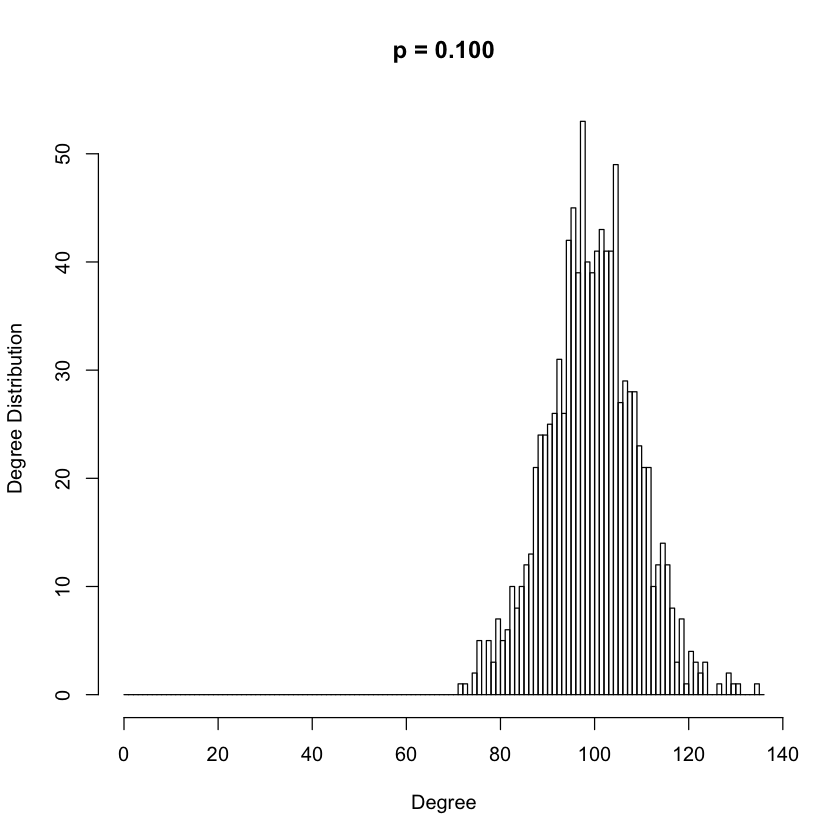

In [3]:
n = 1000
p_list = c(0.003, 0.004, 0.01, 0.05, 0.1)
for (p in p_list) {
    network <- erdos.renyi.game(n, p, type="gnp")
    deg <- degree(network)
    # *****1a*****
    hist(deg, breaks = seq(from = 0, to = max(deg) + 1, by = 1), main = sprintf("Degree Distibution for p = %.3f", p), 
          xlab = "Degree", ylab="Occurrence")
    
    writeLines(paste("Mean: ", mean(deg)))
    writeLines(paste("Variance: ", var(deg)))
    
    # *****1b*****
    writeLines(paste("Connected: ", is_connected(network)))
    writeLines(paste("Diameter: ", diameter(network)))
    if (!is_connected(network)) {
        dg <- decompose.graph(network) 
        #plot(dg[[1]])
        clusters <- components(network)
        print(dim(groups(clusters)))
        writeLines(paste("Diameter of GCC: ", diameter(dg[[1]])))
        writeLines(paste("Nummber of nodes in GCC: ", length(V(dg[[1]]))))
    }
    
}

<h2>1c</h2>

Mean p:  0.504074130029712
Mean p:  0.00368098159509202


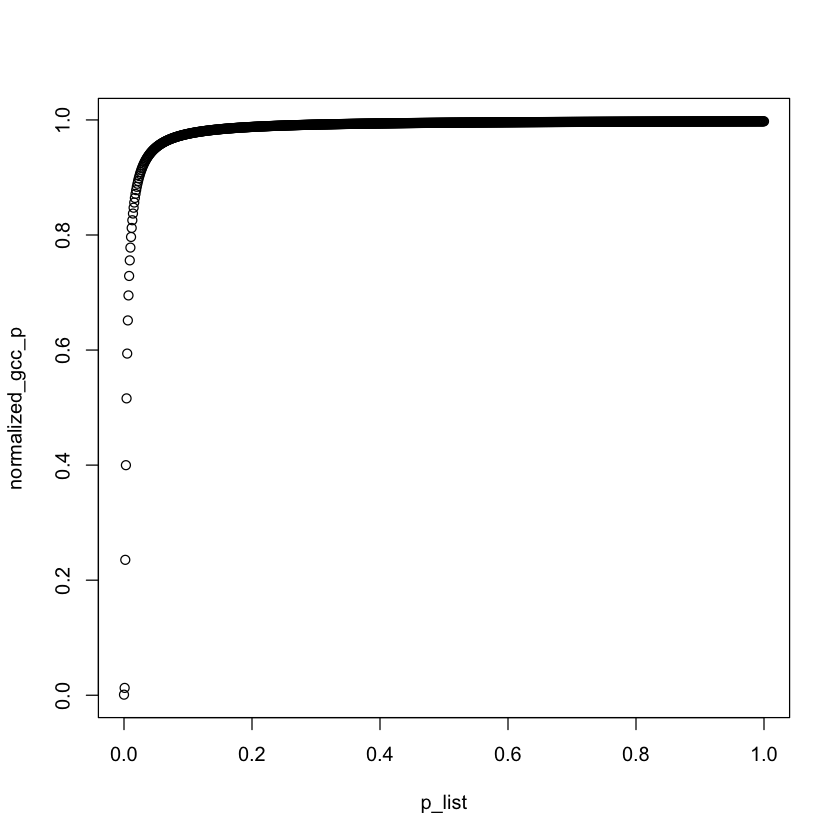

In [34]:
nodes = 1000
num_iterations = 100
p_list <- list()
normalized_gcc <- numeric()
normalized_gcc_p <- list()
count = 1
pc = numeric()
pc1 = numeric()

for (p in seq(from = 0, to = 1.00, by = 1e-03)){
  #writeLines(paste("p: ", p))
  for (i in 1:num_iterations) {
    g = erdos.renyi.game(nodes, p, type="gnp")
    if (is.connected(g)) {
       normalized_gcc = c(normalized_gcc, nodes/nodes)
       pc = c(pc, p) 
    }
    else {
      dg <- decompose.graph(g)      
      normalized_gcc = c(normalized_gcc, length(V(dg[[1]]))/nodes)
      pc1 = c(pc1, p)  
    }
  }
  normalized_gcc_p[count] = mean(normalized_gcc)  
  p_list[count] = p
  #pc = c(pc, p)  
  count = count + 1  
}
plot(p_list, normalized_gcc_p)
writeLines(paste("Mean p: ", mean(pc)))
writeLines(paste("Mean p: ", mean(pc1)))

p value at emergence:  0.006 0.011
p value at emergence:  0.00752


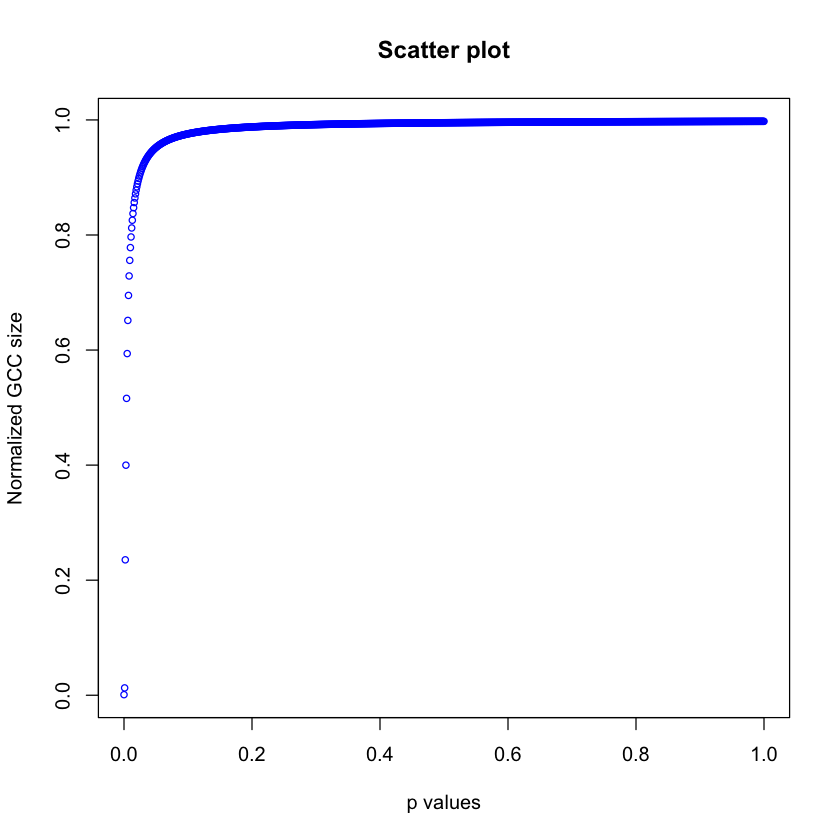

In [40]:
writeLines(paste("p value at emergence: ", min(pc), max(pc1)))
plot(p_list, normalized_gcc_p, xlab="p values", ylab="Normalized GCC size", main="Scatter plot", col="blue", type="p", cex=0.7)
pc = numeric()
for (i in 1:num_iterations) {
  for (p in seq(from = 0, to = 1.00, by = 1e-03)) {
    g = erdos.renyi.game(nodes, p, type="gnp")
    if (is.connected(g)) 
      break
  }
  pc = c(pc, p)
}
#print(pc)
writeLines(paste("p value at emergence: ", mean(pc)))

<h2>1d</h2>

In [5]:
c_list = c(0.5, 1, 1.1, 1.2, 1.3)
colors = rainbow(length(c_list))

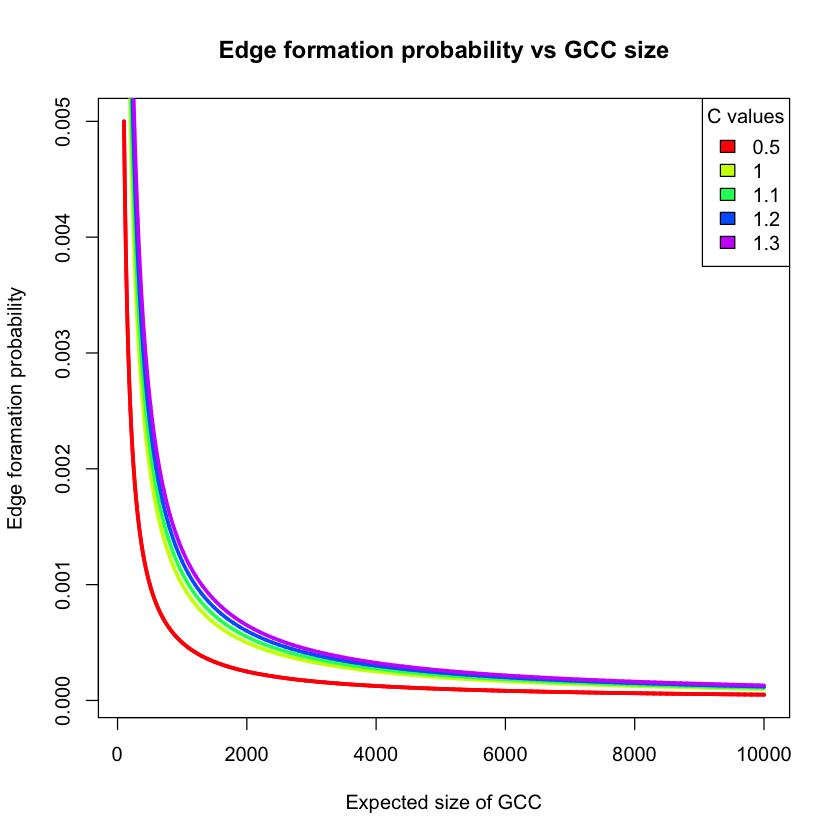

In [6]:
xrange <- seq(100, 10000, by=1)
colr = 1
counter = 1
for (c in c_list) {
    edge_form <- list()
    i = 1
    for (n in xrange) {
        if (n%%1000 == 0) {
            #print(sprintf("%d", n))
        }
        p = c/n
        edge_form[[i]] <- p
        i <- i + 1
    }
    if (counter) {
        plot(xrange, edge_form, xlab="Expected size of GCC", ylab="Edge foramation probability", col=colors[colr], type="l", lwd=3)
        counter = 0
    }
    lines(xrange, edge_form, col=colors[colr], lwd=3)
    colr <- colr + 1
}
legend("topright", legend=c_list, fill=colors, title="C values")
title("Edge formation probability vs GCC size")